<a href="https://colab.research.google.com/github/Sushan9706/Concepts_and_Technologies_of_AI_Final_Assignment/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**5CS037 Final Portfolio Project - classification Task**

Dataset Selection and UN SDG Alignment

1.1 Dataset Description


## Dataset Quality Assessment

Initial assessment indicates:
- Missing values present in several columns (will be addressed in preprocessing)
- Class imbalance in target variable (will be evaluated)
- Relevant features for air quality compliance prediction
- Sufficient data volume (92,574 records) for machine learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/FinalAssignment/us_monthly_electricity.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())

DATASET OVERVIEW
Dataset Shape: (854300, 13)
Number of rows: 854,300
Number of columns: 13

First 5 rows:
                    Country Country code    State State code State type  \
0  United States of America          USA  Alabama         AL      state   
1  United States of America          USA  Alabama         AL      state   
2  United States of America          USA  Alabama         AL      state   
3  United States of America          USA  Alabama         AL      state   
4  United States of America          USA  Alabama         AL      state   

         Date                Category     Subcategory  \
0  2001-01-01  Electricity generation  Aggregate fuel   
1  2001-01-01  Electricity generation  Aggregate fuel   
2  2001-01-01  Electricity generation  Aggregate fuel   
3  2001-01-01  Electricity generation  Aggregate fuel   
4  2001-01-01  Electricity generation  Aggregate fuel   

                                Variable Unit  Value  YoY absolute change  \
0                      

**1. Exploratory Data Analysis and Data Understanding**

1.1 Dataset Information

(a) Dataset Creation and Source

In [ ]:
print("="*80)
print("DATASET METADATA")
print("="*80)
print("""
Dataset Name: US Monthly Electricity Data
Created by: Rht Singh (Kaggle)
Source: U.S. Energy Information Administration (EIA)
Access: https://www.kaggle.com/datasets/rhtsingh/us-electricity-data
Time Period: 2001 onwards (monthly data)
Coverage: All 50 US states plus aggregate data
Last Updated: Contains historical monthly electricity generation and emissions data
""")

DATASET METADATA

Dataset Name: US Monthly Electricity Data
Created by: Rht Singh (Kaggle)
Source: U.S. Energy Information Administration (EIA)
Access: https://www.kaggle.com/datasets/rhtsingh/us-electricity-data
Time Period: 2001 onwards (monthly data)
Coverage: All 50 US states plus aggregate data
Last Updated: Contains historical monthly electricity generation and emissions data



**(b)How the Dataset was Accessed**

The dataset was downloaded from Kaggle (https://www.kaggle.com/datasets/rhtsingh/us-electricity-data) and uploaded to Google Drive for analysis. It contains comprehensive information about electricity generation across different fuel sources and associated CO2 emissions for all US states.

(c) Alignment with UN Sustainable Development Goal

In [ ]:
print("="*80)
print("UN SUSTAINABLE DEVELOPMENT GOAL ALIGNMENT")
print("="*80)
print("""
This dataset aligns with UN SDG 7: Affordable and Clean Energy

Specific Targets:
- SDG 7.2: Increase substantially the share of renewable energy in the global energy mix
- SDG 7.3: Double the global rate of improvement in energy efficiency

Justification:
The dataset contains detailed information about:
1. Clean vs Fossil fuel electricity generation percentages
2. Renewable energy sources (Hydro, Bioenergy, Solar, Wind)
3. Fossil fuel sources (Coal, Gas, Oil)
4. Power sector CO2 emissions
5. State-wise energy transition patterns

This enables analysis of the transition from fossil fuels to clean energy sources,
which is critical for achieving SDG 7 and combating climate change (SDG 13).
""")

UN SUSTAINABLE DEVELOPMENT GOAL ALIGNMENT

This dataset aligns with UN SDG 7: Affordable and Clean Energy

Specific Targets:
- SDG 7.2: Increase substantially the share of renewable energy in the global energy mix
- SDG 7.3: Double the global rate of improvement in energy efficiency

Justification:
The dataset contains detailed information about:
1. Clean vs Fossil fuel electricity generation percentages
2. Renewable energy sources (Hydro, Bioenergy, Solar, Wind)
3. Fossil fuel sources (Coal, Gas, Oil)
4. Power sector CO2 emissions
5. State-wise energy transition patterns

This enables analysis of the transition from fossil fuels to clean energy sources,
which is critical for achieving SDG 7 and combating climate change (SDG 13).



**(d) Dataset Attributes**

In [ ]:
print("="*80)
print("DATASET ATTRIBUTES")
print("="*80)
print("\nColumn Information:")
print(df.info())

print("\n" + "="*80)
print("ATTRIBUTE DESCRIPTIONS")
print("="*80)

attributes = {
    'Country': 'Country name (United States of America)',
    'Country code': 'ISO country code (USA)',
    'State': 'US State name or "Total" for national aggregate',
    'State code': 'Two-letter state abbreviation',
    'State type': 'Classification: "state" or "total" (national)',
    'Date': 'Month and year of measurement (YYYY-MM-DD format)',
    'Category': 'Main category: Electricity generation or Power sector emissions',
    'Subcategory': 'Fuel classification: Aggregate fuel, Fuel, Total, CO2 intensity',
    'Variable': 'Energy source: Clean, Fossil, Coal, Gas, Nuclear, Renewables, etc.',
    'Unit': 'Measurement unit: %, GWh, ktCO2, gCO2/kWh',
    'Value': 'Numerical measurement value',
    'YoY absolute change': 'Year-over-year absolute change in value',
    'YoY % change': 'Year-over-year percentage change'
}

for attr, desc in attributes.items():
    print(f"\n{attr}:")
    print(f"  Description: {desc}")
    print(f"  Data Type: {df[attr].dtype}")
    print(f"  Unique Values: {df[attr].nunique()}")

DATASET ATTRIBUTES

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854300 entries, 0 to 854299
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Country              854300 non-null  object 
 1   Country code         854300 non-null  object 
 2   State                854300 non-null  object 
 3   State code           854300 non-null  object 
 4   State type           854300 non-null  object 
 5   Date                 854300 non-null  object 
 6   Category             854300 non-null  object 
 7   Subcategory          854300 non-null  object 
 8   Variable             854300 non-null  object 
 9   Unit                 854300 non-null  object 
 10  Value                853992 non-null  float64
 11  YoY absolute change  429973 non-null  float64
 12  YoY % change         418949 non-null  float64
dtypes: float64(3), object(10)
memory usage: 84.7+ MB
None

ATTRIBUTE DESCRIPTIONS



**1.2 Research Questions**


In [ ]:
print("="*80)
print("RESEARCH QUESTIONS")
print("="*80)
print("""
This dataset can answer the following meaningful questions:

1. ENERGY TRANSITION CLASSIFICATION:
   Can we classify states into different energy categories based on their
   electricity generation mix (Clean Energy Leaders vs Fossil Fuel Dependent)?

2. RENEWABLE ADOPTION PREDICTION:
   Can we predict whether a state has high renewable energy adoption (>30%)
   based on historical generation patterns and state characteristics?

3. EMISSION INTENSITY CLASSIFICATION:
   Can we classify states into Low, Medium, or High emission categories based
   on their CO2 intensity and fuel mix?

For this assignment, we will focus on QUESTION 2:
CLASSIFICATION TASK: Predict whether a state has HIGH or LOW renewable energy
adoption based on electricity generation features.

Target Variable: Binary classification - High Renewables (>30%) vs Low Renewables (≤30%)
""")

RESEARCH QUESTIONS

This dataset can answer the following meaningful questions:

1. ENERGY TRANSITION CLASSIFICATION:
   Can we classify states into different energy categories based on their 
   electricity generation mix (Clean Energy Leaders vs Fossil Fuel Dependent)?
   
2. RENEWABLE ADOPTION PREDICTION:
   Can we predict whether a state has high renewable energy adoption (>30%) 
   based on historical generation patterns and state characteristics?
   
3. EMISSION INTENSITY CLASSIFICATION:
   Can we classify states into Low, Medium, or High emission categories based 
   on their CO2 intensity and fuel mix?

For this assignment, we will focus on QUESTION 2:
CLASSIFICATION TASK: Predict whether a state has HIGH or LOW renewable energy 
adoption based on electricity generation features.

Target Variable: Binary classification - High Renewables (>30%) vs Low Renewables (≤30%)



In [ ]:
print("="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Missing values
print("\n1. MISSING VALUES:")
print("-" * 40)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

# Data distribution
print("\n2. DATA DISTRIBUTION:")
print("-" * 40)
print(f"Total Records: {len(df):,}")
print(f"\nRecords by Category:")
print(df['Category'].value_counts())
print(f"\nRecords by State Type:")
print(df['State type'].value_counts())

# Check for duplicates
print("\n3. DUPLICATE RECORDS:")
print("-" * 40)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Data relevance
print("\n4. DATA RELEVANCE:")
print("-" * 40)
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of States: {df[df['State type']=='state']['State'].nunique()}")
print(f"Number of Variables: {df['Variable'].nunique()}")

# Noise assessment
print("\n5. NOISE ASSESSMENT:")
print("-" * 40)
print("Value column statistics:")
print(df['Value'].describe())
print(f"\nNegative values (potential noise): {(df['Value'] < 0).sum()}")
print(f"Zero values: {(df['Value'] == 0).sum()}")

DATA QUALITY ASSESSMENT

1. MISSING VALUES:
----------------------------------------
                     Missing Count  Percentage
Value                          308    0.036053
YoY absolute change         424327   49.669554
YoY % change                435351   50.959967

2. DATA DISTRIBUTION:
----------------------------------------
Total Records: 854,300

Records by Category:
Category
Power sector emissions    434798
Electricity generation    419502
Name: count, dtype: int64

Records by State Type:
State type
state    836000
total     18300
Name: count, dtype: int64

3. DUPLICATE RECORDS:
----------------------------------------
Number of duplicate rows: 0

4. DATA RELEVANCE:
----------------------------------------
Date Range: 2001-01-01 to 2025-04-01
Number of States: 52
Number of Variables: 18

5. NOISE ASSESSMENT:
----------------------------------------
Value column statistics:
count    853992.000000
mean       1453.189445
std       10882.451216
min        -248.030000
25%      

**1.3 Data Quality Assessment**

In [ ]:
# Create classification dataset
print("="*80)
print("PREPARING CLASSIFICATION DATASET")
print("="*80)

# Filter for renewable energy percentages by state
renewable_data = df[
    (df['Variable'] == 'Renewables') &
    (df['Unit'] == '%') &
    (df['State type'] == 'state')
].copy()

print(f"\nFiltered data shape: {renewable_data.shape}")
print(f"Date range: {renewable_data['Date'].min()} to {renewable_data['Date'].max()}")
print(f"Number of states: {renewable_data['State'].nunique()}")

# Convert Date to datetime
renewable_data['Date'] = pd.to_datetime(renewable_data['Date'])
renewable_data['Year'] = renewable_data['Date'].dt.year
renewable_data['Month'] = renewable_data['Date'].dt.month

print("\nSample of renewable energy data:")
print(renewable_data[['State', 'Date', 'Value', 'Year', 'Month']].head(10))

PREPARING CLASSIFICATION DATASET

Filtered data shape: (29576, 13)
Date range: 2001-01-01 to 2025-04-01
Number of states: 52

Sample of renewable energy data:
       State       Date   Value  Year  Month
4    Alabama 2001-01-01    9.97  2001      1
29   Alabama 2001-01-01  109.77  2001      1
55   Alabama 2001-02-01   13.10  2001      2
80   Alabama 2001-02-01   98.48  2001      2
106  Alabama 2001-03-01   17.69  2001      3
131  Alabama 2001-03-01  113.00  2001      3
157  Alabama 2001-04-01   13.53  2001      4
182  Alabama 2001-04-01   96.47  2001      4
208  Alabama 2001-05-01    6.99  2001      5
233  Alabama 2001-05-01   79.99  2001      5


**1.4 Data Preparation for Classification**

In [ ]:
print("="*80)
print("DATA CLEANING")
print("="*80)

# Check for missing values in filtered data
print("\nMissing values in renewable data:")
print(renewable_data.isnull().sum())

# Remove rows with missing values in critical columns
renewable_clean = renewable_data.dropna(subset=['Value'])
print(f"\nRows after removing missing values: {len(renewable_clean)}")

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS - Renewable Energy Percentage")
print("="*80)
print(renewable_clean['Value'].describe())

# Statistics by state
print("\n" + "="*80)
print("TOP 10 STATES BY AVERAGE RENEWABLE ENERGY %")
print("="*80)
state_avg = renewable_clean.groupby('State')['Value'].agg(['mean', 'min', 'max', 'std']).round(2)
state_avg = state_avg.sort_values('mean', ascending=False)
print(state_avg.head(10))

print("\n" + "="*80)
print("BOTTOM 10 STATES BY AVERAGE RENEWABLE ENERGY %")
print("="*80)
print(state_avg.tail(10))

DATA CLEANING

Missing values in renewable data:
Country                    0
Country code               0
State                      0
State code                 0
State type                 0
Date                       0
Category                   0
Subcategory                0
Variable                   0
Unit                       0
Value                     12
YoY absolute change    29576
YoY % change           29576
Year                       0
Month                      0
dtype: int64

Rows after removing missing values: 29564

SUMMARY STATISTICS - Renewable Energy Percentage
count    29564.000000
mean        30.037053
std         44.627378
min         -1.950000
25%          5.000000
50%         15.240000
75%         38.235000
max        650.420000
Name: Value, dtype: float64

TOP 10 STATES BY AVERAGE RENEWABLE ENERGY %
              mean    min     max     std
State                                    
California  172.25  16.89  650.42  156.11
Washington  129.69  55.75  293.06  

**2. Exploratory Data Analysis (EDA)**

2.1 Data Cleaning and Summary Statistics


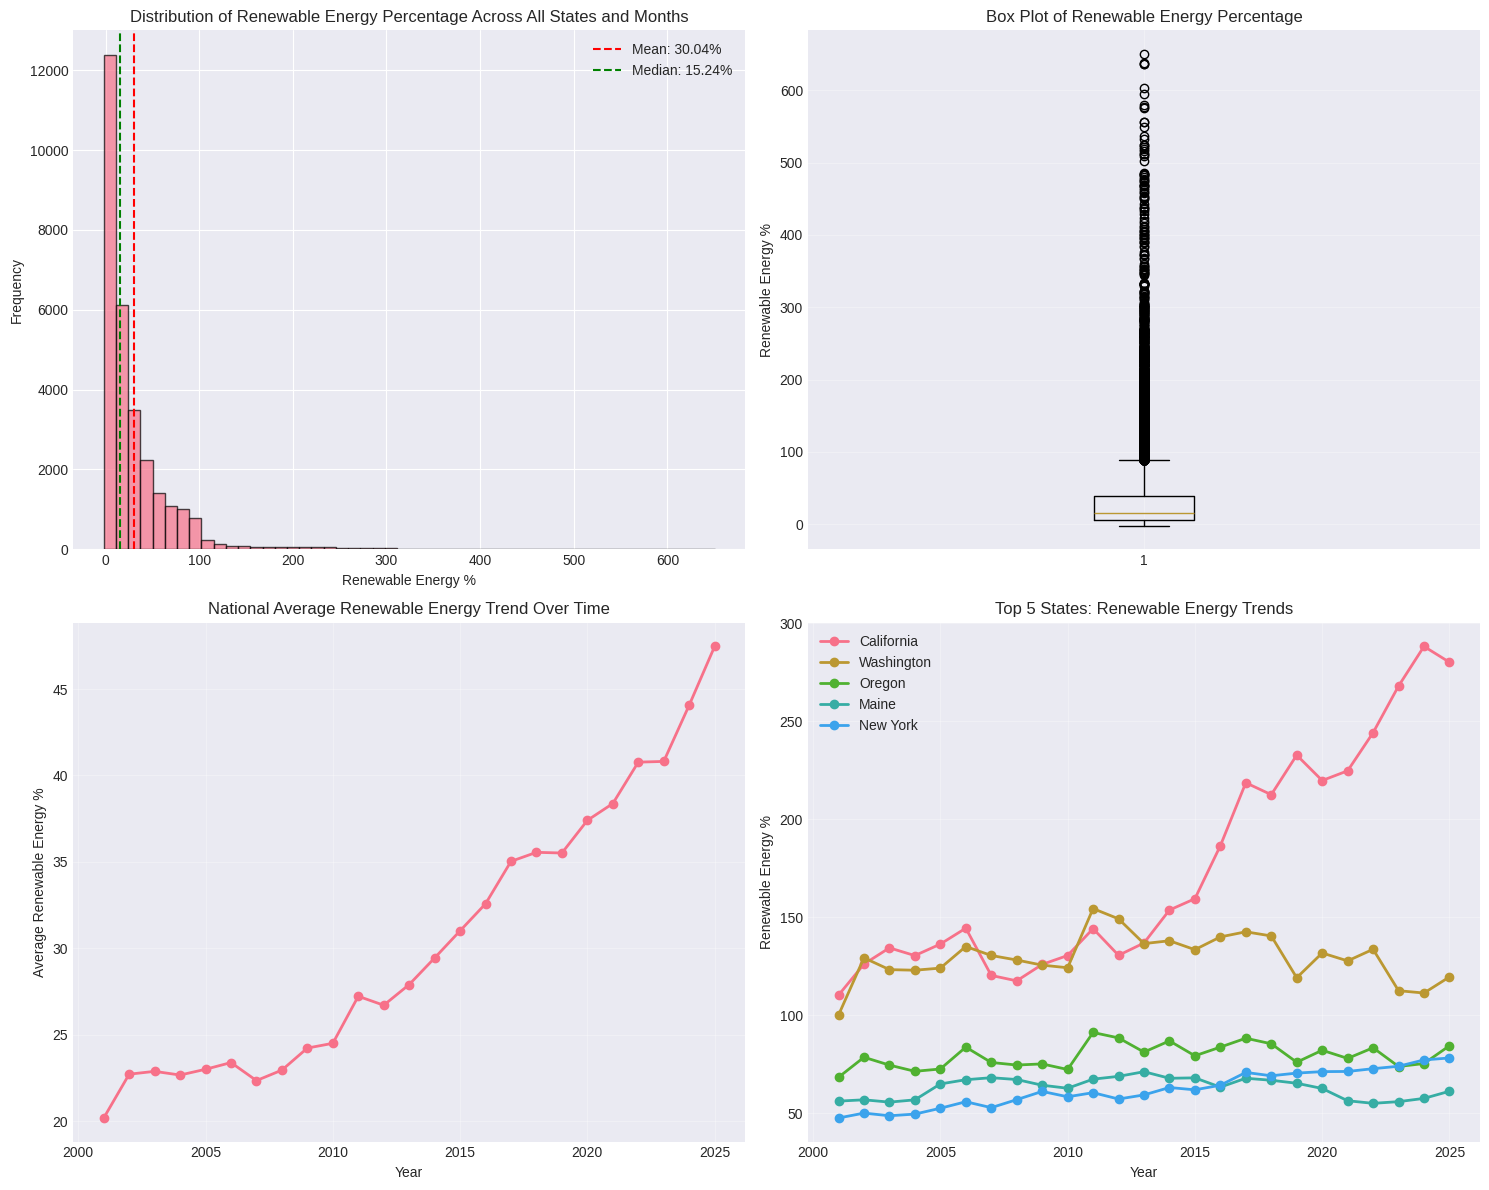


Insights from Distribution Analysis:
--------------------------------------------------------------------------------
1. The renewable energy percentage ranges from -1.95% to 650.42%
2. Mean renewable energy: 30.04%, Median: 15.24%
3. Standard deviation: 44.63%, indicating high variability across states
4. The distribution is right-skewed, with most states having lower renewable percentages
5. Over time, there is a clear upward trend in renewable energy adoption nationally


In [ ]:
# Visualization 1: Distribution of Renewable Energy Percentage
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0, 0].hist(renewable_clean['Value'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Renewable Energy %')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Renewable Energy Percentage Across All States and Months')
axes[0, 0].axvline(renewable_clean['Value'].mean(), color='red', linestyle='--', label=f'Mean: {renewable_clean["Value"].mean():.2f}%')
axes[0, 0].axvline(renewable_clean['Value'].median(), color='green', linestyle='--', label=f'Median: {renewable_clean["Value"].median():.2f}%')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(renewable_clean['Value'])
axes[0, 1].set_ylabel('Renewable Energy %')
axes[0, 1].set_title('Box Plot of Renewable Energy Percentage')
axes[0, 1].grid(True, alpha=0.3)

# Time series - Overall trend
yearly_avg = renewable_clean.groupby('Year')['Value'].mean()
axes[1, 0].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Renewable Energy %')
axes[1, 0].set_title('National Average Renewable Energy Trend Over Time')
axes[1, 0].grid(True, alpha=0.3)

# Top states comparison
top_states = state_avg.head(5).index
for state in top_states:
    state_data = renewable_clean[renewable_clean['State'] == state].groupby('Year')['Value'].mean()
    axes[1, 1].plot(state_data.index, state_data.values, marker='o', label=state, linewidth=2)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Renewable Energy %')
axes[1, 1].set_title('Top 5 States: Renewable Energy Trends')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('renewable_energy_eda.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInsights from Distribution Analysis:")
print("-" * 80)
print(f"1. The renewable energy percentage ranges from {renewable_clean['Value'].min():.2f}% to {renewable_clean['Value'].max():.2f}%")
print(f"2. Mean renewable energy: {renewable_clean['Value'].mean():.2f}%, Median: {renewable_clean['Value'].median():.2f}%")
print(f"3. Standard deviation: {renewable_clean['Value'].std():.2f}%, indicating high variability across states")
print(f"4. The distribution is right-skewed, with most states having lower renewable percentages")
print(f"5. Over time, there is a clear upward trend in renewable energy adoption nationally")

**2.2 Data Visualizations**


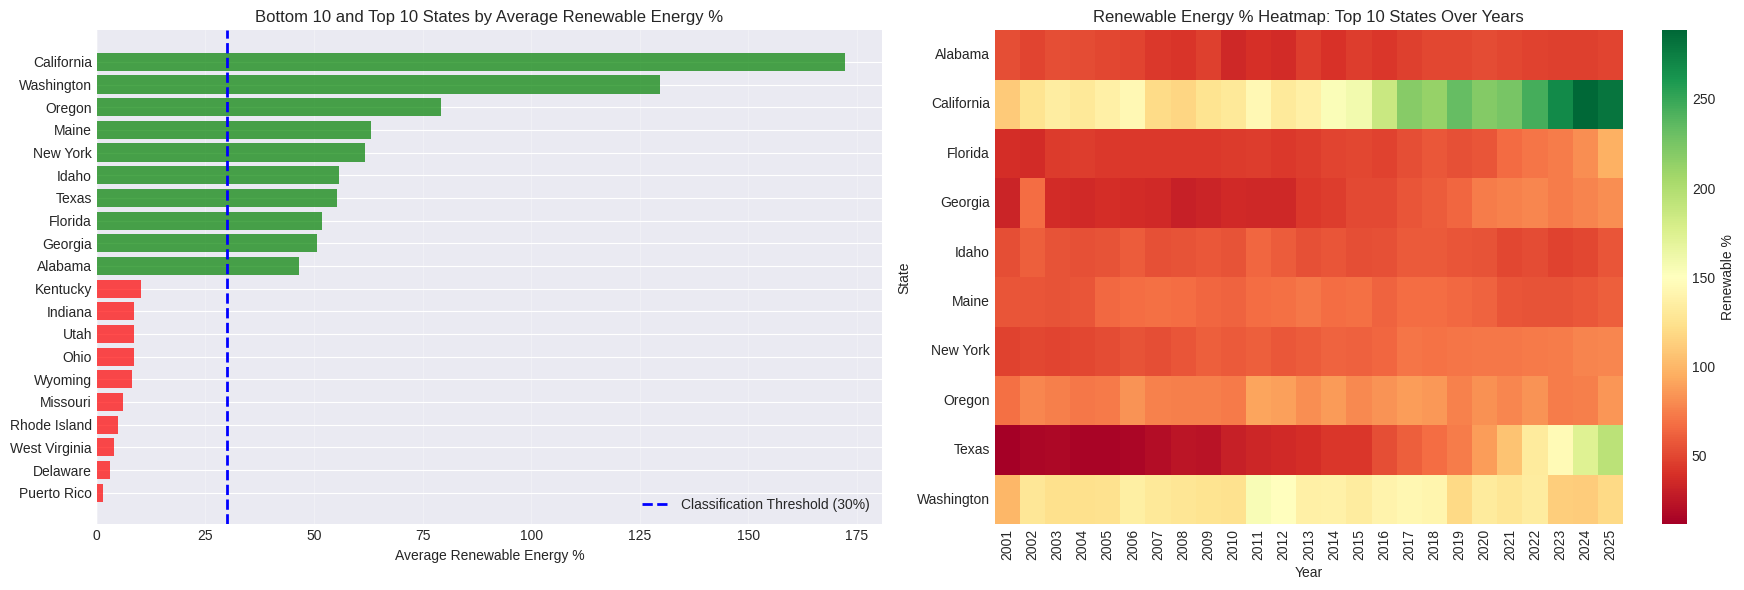


Insights from State Comparison:
--------------------------------------------------------------------------------
1. Significant disparity exists between states in renewable energy adoption
2. States like Washington, Oregon, and Idaho have consistently high renewable percentages (hydroelectric)
3. States heavily reliant on fossil fuels show renewable percentages below 10%
4. Geographic and resource availability play crucial roles in renewable adoption
5. A 30% threshold effectively separates high and low renewable energy states


In [ ]:
# Visualization 2: State-wise renewable energy comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot of average renewable by state
state_avg_sorted = state_avg.sort_values('mean', ascending=True)
top_bottom = pd.concat([state_avg_sorted.head(10), state_avg_sorted.tail(10)])

axes[0].barh(range(len(top_bottom)), top_bottom['mean'], color=['red']*10 + ['green']*10, alpha=0.7)
axes[0].set_yticks(range(len(top_bottom)))
axes[0].set_yticklabels(top_bottom.index)
axes[0].set_xlabel('Average Renewable Energy %')
axes[0].set_title('Bottom 10 and Top 10 States by Average Renewable Energy %')
axes[0].axvline(30, color='blue', linestyle='--', linewidth=2, label='Classification Threshold (30%)')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Heatmap showing renewable trends by year for selected states
selected_states = state_avg.head(10).index.tolist()
pivot_data = renewable_clean[renewable_clean['State'].isin(selected_states)].pivot_table(
    values='Value',
    index='State',
    columns='Year',
    aggfunc='mean'
)

sns.heatmap(pivot_data, annot=False, cmap='RdYlGn', ax=axes[1], cbar_kws={'label': 'Renewable %'})
axes[1].set_title('Renewable Energy % Heatmap: Top 10 States Over Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('State')

plt.tight_layout()
plt.savefig('state_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInsights from State Comparison:")
print("-" * 80)
print("1. Significant disparity exists between states in renewable energy adoption")
print("2. States like Washington, Oregon, and Idaho have consistently high renewable percentages (hydroelectric)")
print("3. States heavily reliant on fossil fuels show renewable percentages below 10%")
print("4. Geographic and resource availability play crucial roles in renewable adoption")
print("5. A 30% threshold effectively separates high and low renewable energy states")

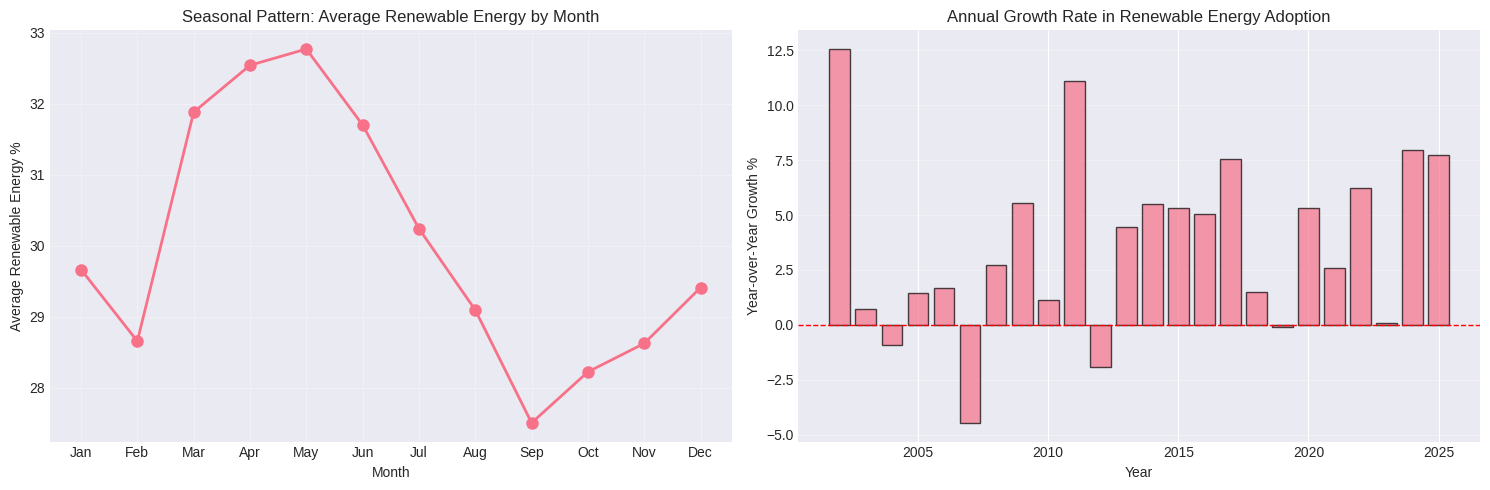


Insights from Temporal Analysis:
--------------------------------------------------------------------------------
1. Seasonal variations exist, with certain months showing higher renewable generation
2. Hydroelectric power causes seasonal fluctuations (higher in spring due to snowmelt)
3. Consistent year-over-year growth in renewable energy adoption across the nation
4. Growth rate has accelerated in recent years, indicating policy and technology improvements


In [ ]:
# Visualization 3: Seasonal patterns and monthly variation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Monthly patterns
monthly_avg = renewable_clean.groupby('Month')['Value'].mean()
axes[0].plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Renewable Energy %')
axes[0].set_title('Seasonal Pattern: Average Renewable Energy by Month')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(True, alpha=0.3)

# Year-over-year growth
yearly_avg = renewable_clean.groupby('Year')['Value'].mean()
yearly_growth = yearly_avg.pct_change() * 100
axes[1].bar(yearly_growth.index, yearly_growth.values, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Year-over-Year Growth %')
axes[1].set_title('Annual Growth Rate in Renewable Energy Adoption')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInsights from Temporal Analysis:")
print("-" * 80)
print("1. Seasonal variations exist, with certain months showing higher renewable generation")
print("2. Hydroelectric power causes seasonal fluctuations (higher in spring due to snowmelt)")
print("3. Consistent year-over-year growth in renewable energy adoption across the nation")
print("4. Growth rate has accelerated in recent years, indicating policy and technology improvements")

In [ ]:
print("="*80)
print("FEATURE ENGINEERING FOR CLASSIFICATION")
print("="*80)

# Create aggregated features by state and time period
# We'll use recent data (latest year per state) for classification

# Get the most recent data for each state
latest_year = renewable_clean.groupby('State')['Year'].max().reset_index()
latest_year.columns = ['State', 'LatestYear']

# Merge to get latest year data
renewable_latest = renewable_clean.merge(latest_year, on='State')
renewable_latest = renewable_latest[renewable_latest['Year'] == renewable_latest['LatestYear']]

# Create features from the full dataset
# 1. Historical average
historical_avg = renewable_clean.groupby('State')['Value'].mean().reset_index()
historical_avg.columns = ['State', 'Historical_Avg']

# 2. Trend (slope over time)
def calculate_trend(group):
    years = group['Year'].values
    values = group['Value'].values
    if len(years) > 1:
        slope = np.polyfit(years, values, 1)[0]
    else:
        slope = 0
    return slope

trend = renewable_clean.groupby('State').apply(calculate_trend).reset_index()
trend.columns = ['State', 'Trend']

# 3. Volatility (standard deviation)
volatility = renewable_clean.groupby('State')['Value'].std().reset_index()
volatility.columns = ['State', 'Volatility']

# 4. Recent average (last 3 years)
recent_years = renewable_clean['Year'].max() - 2
recent_avg = renewable_clean[renewable_clean['Year'] >= recent_years].groupby('State')['Value'].mean().reset_index()
recent_avg.columns = ['State', 'Recent_Avg']

# 5. Min and Max values
min_max = renewable_clean.groupby('State')['Value'].agg(['min', 'max']).reset_index()
min_max.columns = ['State', 'Min_Value', 'Max_Value']
min_max['Range'] = min_max['Max_Value'] - min_max['Min_Value']

# Merge all features
features_df = historical_avg
features_df = features_df.merge(trend, on='State')
features_df = features_df.merge(volatility, on='State')
features_df = features_df.merge(recent_avg, on='State')
features_df = features_df.merge(min_max, on='State')

# Create target variable: High renewable (>30%) or Low renewable (<=30%)
# Using recent average as the basis
features_df['Target'] = (features_df['Recent_Avg'] > 30).astype(int)
features_df['Target_Label'] = features_df['Target'].map({1: 'High Renewables', 0: 'Low Renewables'})

print("\nFeature Dataset Shape:", features_df.shape)
print("\nFeatures created:")
print(features_df.columns.tolist())

print("\n" + "="*80)
print("CLASSIFICATION TARGET DISTRIBUTION")
print("="*80)
print(features_df['Target_Label'].value_counts())
print("\nClass Balance:")
print(features_df['Target'].value_counts(normalize=True) * 100)

print("\n" + "="*80)
print("SAMPLE OF FEATURE DATASET")
print("="*80)
print(features_df.head(10))

# Check for imbalance
class_counts = features_df['Target'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 2:
    print("WARNING: Dataset is imbalanced. Consider using stratified sampling.")
else:
    print("Dataset has reasonable class balance.")

FEATURE ENGINEERING FOR CLASSIFICATION

Feature Dataset Shape: (52, 10)

Features created:
['State', 'Historical_Avg', 'Trend', 'Volatility', 'Recent_Avg', 'Min_Value', 'Max_Value', 'Range', 'Target', 'Target_Label']

CLASSIFICATION TARGET DISTRIBUTION
Target_Label
High Renewables    28
Low Renewables     24
Name: count, dtype: int64

Class Balance:
Target
1    53.846154
0    46.153846
Name: proportion, dtype: float64

SAMPLE OF FEATURE DATASET
         State  Historical_Avg     Trend  Volatility  Recent_Avg  Min_Value  \
0      Alabama       46.575993 -0.066489   38.226066   47.166607       3.59   
1       Alaska       14.192312  0.263708   11.370402   15.604643       1.84   
2      Arizona       22.168288  1.592159   19.089706   45.745893       4.37   
3     Arkansas       22.142038 -0.207776   13.793434   21.495357       3.41   
4   California      172.249332  6.903581  156.105242  278.454107      16.89   
5     Colorado       17.051935  1.777365   13.475759   43.753214       0.97  

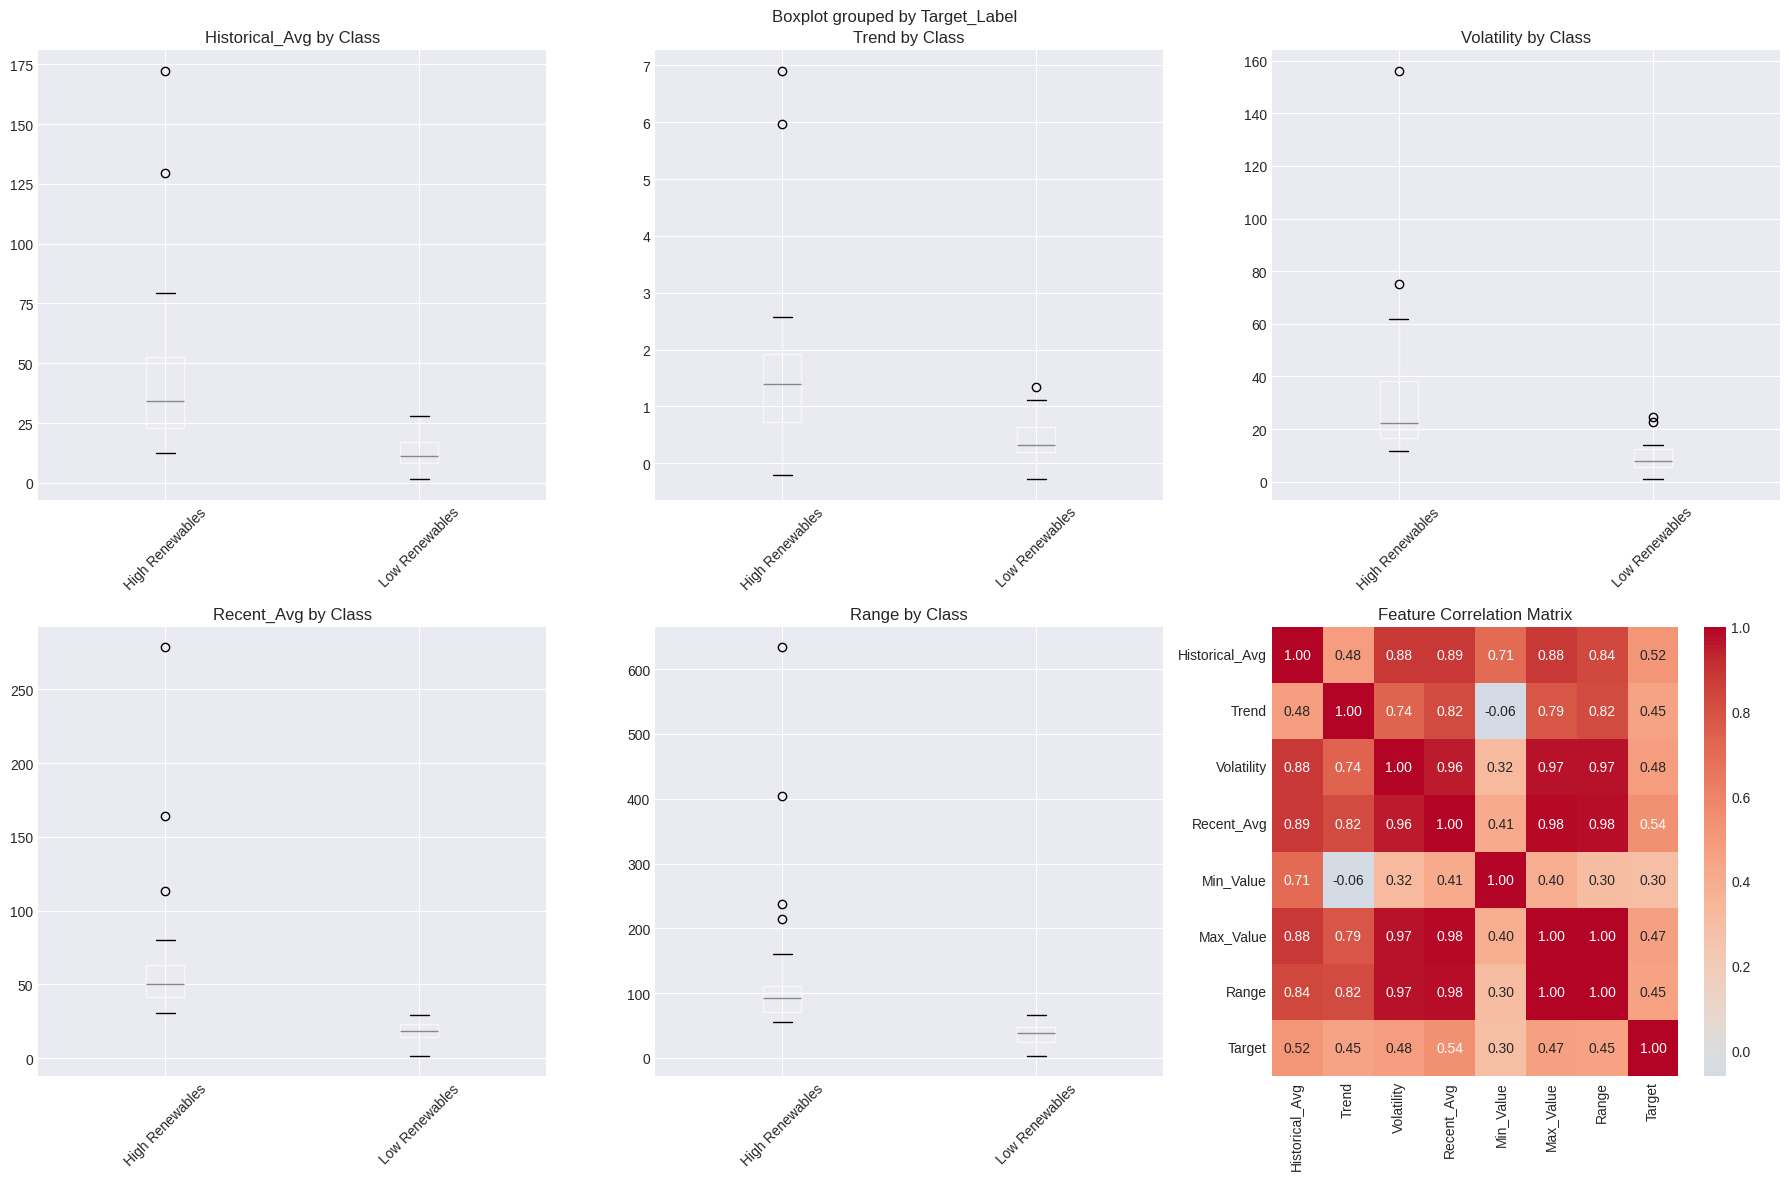


Insights from Feature Analysis:
--------------------------------------------------------------------------------
1. Historical_Avg and Recent_Avg show strong separation between classes
2. Positive trend values indicate states moving toward higher renewable adoption
3. High correlation between Historical_Avg and Recent_Avg (expected)
4. Volatility varies across states, reflecting different energy policies and resources
5. Range captures the growth potential and historical variation in each state


In [ ]:
# Visualize feature distributions and relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Feature distributions by class
features_to_plot = ['Historical_Avg', 'Trend', 'Volatility', 'Recent_Avg', 'Range']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3

    features_df.boxplot(column=feature, by='Target_Label', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Class')
    axes[row, col].set_xlabel('')
    plt.sca(axes[row, col])
    plt.xticks(rotation=45)

# Correlation heatmap
feature_cols = ['Historical_Avg', 'Trend', 'Volatility', 'Recent_Avg', 'Min_Value', 'Max_Value', 'Range', 'Target']
corr_matrix = features_df[feature_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 2])
axes[1, 2].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.savefig('feature_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInsights from Feature Analysis:")
print("-" * 80)
print("1. Historical_Avg and Recent_Avg show strong separation between classes")
print("2. Positive trend values indicate states moving toward higher renewable adoption")
print("3. High correlation between Historical_Avg and Recent_Avg (expected)")
print("4. Volatility varies across states, reflecting different energy policies and resources")
print("5. Range captures the growth potential and historical variation in each state")

**2.3 Feature Engineering for Classification**

In [ ]:
print("="*80)
print("PREPARING DATA FOR MODELING")
print("="*80)

# Select features for modeling
feature_columns = ['Historical_Avg', 'Trend', 'Volatility', 'Recent_Avg', 'Min_Value', 'Max_Value', 'Range']
X = features_df[feature_columns].values
y = features_df['Target'].values

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {feature_columns}")

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())
print(f"\nClass distribution in testing set:")
print(pd.Series(y_test).value_counts())

# Feature scaling (important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed using StandardScaler")
print("Training set scaled shape:", X_train_scaled.shape)

PREPARING DATA FOR MODELING
Feature matrix shape: (52, 7)
Target vector shape: (52,)

Features used: ['Historical_Avg', 'Trend', 'Volatility', 'Recent_Avg', 'Min_Value', 'Max_Value', 'Range']

Training set size: 41
Testing set size: 11

Class distribution in training set:
1    22
0    19
Name: count, dtype: int64

Class distribution in testing set:
1    6
0    5
Name: count, dtype: int64

Feature scaling completed using StandardScaler
Training set scaled shape: (41, 7)


In [ ]:
print("="*80)
print("NEURAL NETWORK MODEL ARCHITECTURE")
print("="*80)

# Build Multi-Layer Perceptron (MLP) Classifier
nn_model = MLPClassifier(
    hidden_layer_sizes=(16, 8),  # Two hidden layers with 16 and 8 neurons
    activation='relu',            # ReLU activation function
    solver='adam',                # Adam optimizer
    alpha=0.001,                  # L2 regularization parameter
    batch_size='auto',            # Automatic batch size
    learning_rate='adaptive',     # Adaptive learning rate
    learning_rate_init=0.001,     # Initial learning rate
    max_iter=500,                 # Maximum iterations
    random_state=42,              # Reproducibility
    early_stopping=True,          # Early stopping to prevent overfitting
    validation_fraction=0.2,      # 20% of training data for validation
    n_iter_no_change=20,          # Patience for early stopping
    verbose=False
)

print("Architecture Details:")
print("-" * 80)
print(f"Input Layer: {X_train_scaled.shape[1]} neurons (number of features)")
print(f"Hidden Layer 1: 16 neurons with ReLU activation")
print(f"Hidden Layer 2: 8 neurons with ReLU activation")
print(f"Output Layer: 2 neurons (binary classification) with softmax activation")
print(f"\nTotal layers: 4 (1 input + 2 hidden + 1 output)")
print(f"\nActivation Function: ReLU (Rectified Linear Unit)")
print(f"  - Formula: f(x) = max(0, x)")
print(f"  - Advantage: Helps prevent vanishing gradient problem")
print(f"\nOptimization Algorithm: Adam (Adaptive Moment Estimation)")
print(f"  - Combines advantages of AdaGrad and RMSProp")
print(f"  - Adapts learning rate for each parameter")
print(f"\nLoss Function: Log Loss (Cross-Entropy)")
print(f"  - Formula: -Σ(y_true * log(y_pred))")
print(f"  - Suitable for binary classification problems")
print(f"\nRegularization: L2 (Ridge) with alpha=0.001")
print(f"  - Prevents overfitting by penalizing large weights")

NEURAL NETWORK MODEL ARCHITECTURE
Architecture Details:
--------------------------------------------------------------------------------
Input Layer: 7 neurons (number of features)
Hidden Layer 1: 16 neurons with ReLU activation
Hidden Layer 2: 8 neurons with ReLU activation
Output Layer: 2 neurons (binary classification) with softmax activation

Total layers: 4 (1 input + 2 hidden + 1 output)

Activation Function: ReLU (Rectified Linear Unit)
  - Formula: f(x) = max(0, x)
  - Advantage: Helps prevent vanishing gradient problem

Optimization Algorithm: Adam (Adaptive Moment Estimation)
  - Combines advantages of AdaGrad and RMSProp
  - Adapts learning rate for each parameter

Loss Function: Log Loss (Cross-Entropy)
  - Formula: -Σ(y_true * log(y_pred))
  - Suitable for binary classification problems

Regularization: L2 (Ridge) with alpha=0.001
  - Prevents overfitting by penalizing large weights


**2. Build a Neural Network Model**

2.1 Data Preparation

In [ ]:
print("="*80)
print("TRAINING NEURAL NETWORK MODEL")
print("="*80)

# Train the model
nn_model.fit(X_train_scaled, y_train)

print(f"Training completed successfully")
print(f"Number of iterations: {nn_model.n_iter_}")
print(f"Final loss value: {nn_model.loss_:.6f}")

# Make predictions
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Calculate metrics
train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
test_precision_nn = precision_score(y_test, y_test_pred_nn, average='weighted')
test_recall_nn = recall_score(y_test, y_test_pred_nn, average='weighted')
test_f1_nn = f1_score(y_test, y_test_pred_nn, average='weighted')

print("\n" + "="*80)
print("NEURAL NETWORK MODEL PERFORMANCE")
print("="*80)
print(f"\nTraining Set Accuracy: {train_accuracy_nn:.4f}")
print(f"Testing Set Accuracy: {test_accuracy_nn:.4f}")
print(f"\nTesting Set Metrics:")
print(f"  Precision: {test_precision_nn:.4f}")
print(f"  Recall: {test_recall_nn:.4f}")
print(f"  F1-Score: {test_f1_nn:.4f}")

print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORT - NEURAL NETWORK")
print("="*80)
print(classification_report(y_test, y_test_pred_nn, target_names=['Low Renewables', 'High Renewables']))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
print("\n" + "="*80)
print("CONFUSION MATRIX - NEURAL NETWORK")
print("="*80)
print(cm_nn)

TRAINING NEURAL NETWORK MODEL
Training completed successfully
Number of iterations: 22
Final loss value: 0.642479

NEURAL NETWORK MODEL PERFORMANCE

Training Set Accuracy: 0.5366
Testing Set Accuracy: 0.5455

Testing Set Metrics:
  Precision: 0.2975
  Recall: 0.5455
  F1-Score: 0.3850

DETAILED CLASSIFICATION REPORT - NEURAL NETWORK
                 precision    recall  f1-score   support

 Low Renewables       0.00      0.00      0.00         5
High Renewables       0.55      1.00      0.71         6

       accuracy                           0.55        11
      macro avg       0.27      0.50      0.35        11
   weighted avg       0.30      0.55      0.39        11


CONFUSION MATRIX - NEURAL NETWORK
[[0 5]
 [0 6]]


**2.2 Data Visualizations**

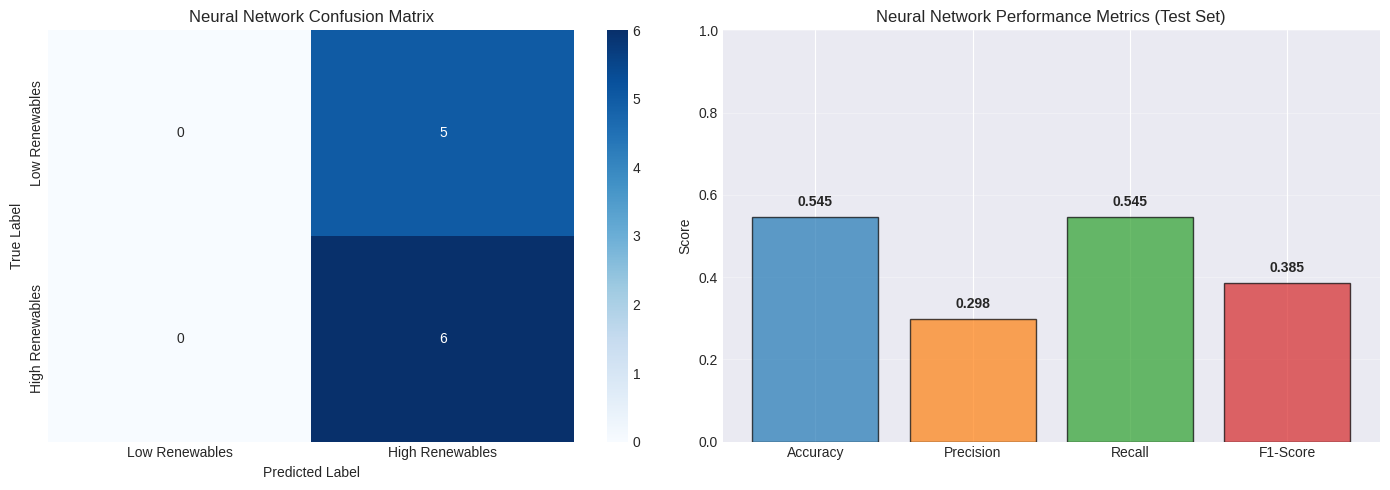

In [ ]:
# Visualize Neural Network performance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Low Renewables', 'High Renewables'],
            yticklabels=['Low Renewables', 'High Renewables'])
axes[0].set_title('Neural Network Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Performance metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_accuracy_nn, test_precision_nn, test_recall_nn, test_f1_nn]
axes[1].bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7, edgecolor='black')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('Score')
axes[1].set_title('Neural Network Performance Metrics (Test Set)')
axes[1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(values):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('neural_network_performance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("="*80)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*80)

# Build Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr, average='weighted')
test_recall_lr = recall_score(y_test, y_test_pred_lr, average='weighted')
test_f1_lr = f1_score(y_test, y_test_pred_lr, average='weighted')

print("\nLogistic Regression Performance:")
print("-" * 80)
print(f"Training Set Accuracy: {train_accuracy_lr:.4f}")
print(f"Testing Set Accuracy: {test_accuracy_lr:.4f}")
print(f"\nTesting Set Metrics:")
print(f"  Precision: {test_precision_lr:.4f}")
print(f"  Recall: {test_recall_lr:.4f}")
print(f"  F1-Score: {test_f1_lr:.4f}")

print("\n" + "="*80)
print("CLASSIFICATION REPORT - LOGISTIC REGRESSION")
print("="*80)
print(classification_report(y_test, y_test_pred_lr, target_names=['Low Renewables', 'High Renewables']))

# Feature importance (coefficients)
print("\n" + "="*80)
print("FEATURE IMPORTANCE - LOGISTIC REGRESSION")
print("="*80)
feature_importance_lr = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_importance_lr)

MODEL 1: LOGISTIC REGRESSION

Logistic Regression Performance:
--------------------------------------------------------------------------------
Training Set Accuracy: 0.9756
Testing Set Accuracy: 0.8182

Testing Set Metrics:
  Precision: 0.8701
  Recall: 0.8182
  F1-Score: 0.8152

CLASSIFICATION REPORT - LOGISTIC REGRESSION
                 precision    recall  f1-score   support

 Low Renewables       0.71      1.00      0.83         5
High Renewables       1.00      0.67      0.80         6

       accuracy                           0.82        11
      macro avg       0.86      0.83      0.82        11
   weighted avg       0.87      0.82      0.82        11


FEATURE IMPORTANCE - LOGISTIC REGRESSION
          Feature  Coefficient
3      Recent_Avg     1.288241
1           Trend     1.226612
0  Historical_Avg     1.141369
5       Max_Value     0.867649
2      Volatility     0.852178
6           Range     0.837021
4       Min_Value     0.583111


In [ ]:
print("="*80)
print("MODEL 2: RANDOM FOREST CLASSIFIER")
print("="*80)

# Build Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculate metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

print("\nRandom Forest Performance:")
print("-" * 80)
print(f"Training Set Accuracy: {train_accuracy_rf:.4f}")
print(f"Testing Set Accuracy: {test_accuracy_rf:.4f}")
print(f"\nTesting Set Metrics:")
print(f"  Precision: {test_precision_rf:.4f}")
print(f"  Recall: {test_recall_rf:.4f}")
print(f"  F1-Score: {test_f1_rf:.4f}")

print("\n" + "="*80)
print("CLASSIFICATION REPORT - RANDOM FOREST")
print("="*80)
print(classification_report(y_test, y_test_pred_rf, target_names=['Low Renewables', 'High Renewables']))

# Feature importance
print("\n" + "="*80)
print("FEATURE IMPORTANCE - RANDOM FOREST")
print("="*80)
feature_importance_rf = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_rf)

MODEL 2: RANDOM FOREST CLASSIFIER

Random Forest Performance:
--------------------------------------------------------------------------------
Training Set Accuracy: 1.0000
Testing Set Accuracy: 0.9091

Testing Set Metrics:
  Precision: 0.9221
  Recall: 0.9091
  F1-Score: 0.9075

CLASSIFICATION REPORT - RANDOM FOREST
                 precision    recall  f1-score   support

 Low Renewables       1.00      0.80      0.89         5
High Renewables       0.86      1.00      0.92         6

       accuracy                           0.91        11
      macro avg       0.93      0.90      0.91        11
   weighted avg       0.92      0.91      0.91        11


FEATURE IMPORTANCE - RANDOM FOREST
          Feature  Importance
6           Range    0.282891
3      Recent_Avg    0.251993
5       Max_Value    0.227808
0  Historical_Avg    0.099769
2      Volatility    0.088054
1           Trend    0.028639
4       Min_Value    0.020846


In [ ]:
print("="*80)
print("INITIAL MODEL COMPARISON")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression', 'Random Forest'],
    'Train Accuracy': [train_accuracy_nn, train_accuracy_lr, train_accuracy_rf],
    'Test Accuracy': [test_accuracy_nn, test_accuracy_lr, test_accuracy_rf],
    'Precision': [test_precision_nn, test_precision_lr, test_precision_rf],
    'Recall': [test_recall_nn, test_recall_lr, test_recall_rf],
    'F1-Score': [test_f1_nn, test_f1_lr, test_f1_rf]
})

print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("INITIAL BEST MODEL")
print("="*80)
best_model_idx = comparison_df['Test Accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Test Accuracy']

print(f"Best performing model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f}")
print(f"\nJustification:")
if best_model_name == 'Random Forest':
    print("Random Forest performs best due to its ensemble nature, handling non-linear")
    print("relationships effectively and reducing overfitting through bootstrapping.")
elif best_model_name == 'Logistic Regression':
    print("Logistic Regression performs best, suggesting linear separability of classes")
    print("and effectiveness of simple models for this dataset.")
else:
    print("Neural Network performs best, capturing complex patterns in the data")
    print("through its multi-layer architecture and non-linear activation functions.")

INITIAL MODEL COMPARISON
              Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
     Neural Network        0.536585       0.545455   0.297521 0.545455  0.385027
Logistic Regression        0.975610       0.818182   0.870130 0.818182  0.815152
      Random Forest        1.000000       0.909091   0.922078 0.909091  0.907537

INITIAL BEST MODEL
Best performing model: Random Forest
Test Accuracy: 0.9091

Justification:
Random Forest performs best due to its ensemble nature, handling non-linear
relationships effectively and reducing overfitting through bootstrapping.


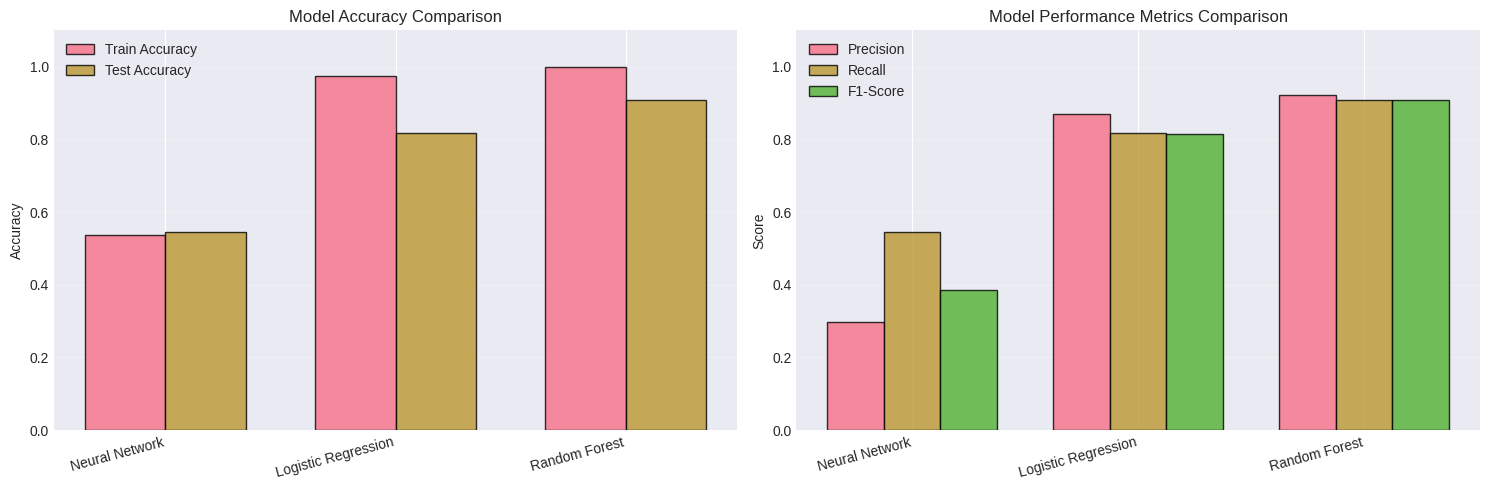

In [ ]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
models = comparison_df['Model']
train_acc = comparison_df['Train Accuracy']
test_acc = comparison_df['Test Accuracy']

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_acc, width, label='Train Accuracy', alpha=0.8, edgecolor='black')
axes[0].bar(x + width/2, test_acc, width, label='Test Accuracy', alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1.1])

# All metrics comparison
metrics_data = comparison_df[['Precision', 'Recall', 'F1-Score']].values
x = np.arange(len(models))
width = 0.25

axes[1].bar(x - width, metrics_data[:, 0], width, label='Precision', alpha=0.8, edgecolor='black')
axes[1].bar(x, metrics_data[:, 1], width, label='Recall', alpha=0.8, edgecolor='black')
axes[1].bar(x + width, metrics_data[:, 2], width, label='F1-Score', alpha=0.8, edgecolor='black')
axes[1].set_ylabel('Score')
axes[1].set_title('Model Performance Metrics Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=15, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('initial_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("="*80)
print("HYPERPARAMETER TUNING - LOGISTIC REGRESSION")
print("="*80)

# Define hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

print("Hyperparameters to tune:")
for param, values in lr_param_grid.items():
    print(f"  {param}: {values}")

# Perform Grid Search with Cross-Validation
lr_grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\nPerforming 5-fold Cross-Validation Grid Search...")
lr_grid_search.fit(X_train_scaled, y_train)

print("\n" + "="*80)
print("BEST HYPERPARAMETERS - LOGISTIC REGRESSION")
print("="*80)
print(lr_grid_search.best_params_)

print("\n" + "="*80)
print("BEST CROSS-VALIDATION SCORE - LOGISTIC REGRESSION")
print("="*80)
print(f"Best CV Score: {lr_grid_search.best_score_:.4f}")

# Show top 5 parameter combinations
cv_results_lr = pd.DataFrame(lr_grid_search.cv_results_)
top_results_lr = cv_results_lr.nsmallest(5, 'rank_test_score')[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
]
print("\nTop 5 parameter combinations:")
print(top_results_lr.to_string(index=False))

HYPERPARAMETER TUNING - LOGISTIC REGRESSION
Hyperparameters to tune:
  C: [0.001, 0.01, 0.1, 1, 10, 100]
  penalty: ['l1', 'l2']
  solver: ['liblinear', 'saga']
  max_iter: [1000, 2000]

Performing 5-fold Cross-Validation Grid Search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

BEST HYPERPARAMETERS - LOGISTIC REGRESSION
{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

BEST CROSS-VALIDATION SCORE - LOGISTIC REGRESSION
Best CV Score: 0.9750

Top 5 parameter combinations:
                                                             params  mean_test_score  std_test_score  rank_test_score
      {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}            0.975            0.05                1
      {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}            0.975            0.05                1
      {'C': 1, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}            0.975            0.05                1
      {'C': 1, 'max

In [ ]:
print("="*80)
print("HYPERPARAMETER TUNING - RANDOM FOREST")
print("="*80)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print("Hyperparameters to tune:")
for param, values in rf_param_grid.items():
    print(f"  {param}: {values}")

# Use RandomizedSearchCV for efficiency (large parameter space)
rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\nPerforming 5-fold Cross-Validation Randomized Search (50 iterations)...")
rf_random_search.fit(X_train_scaled, y_train)

print("\n" + "="*80)
print("BEST HYPERPARAMETERS - RANDOM FOREST")
print("="*80)
print(rf_random_search.best_params_)

print("\n" + "="*80)
print("BEST CROSS-VALIDATION SCORE - RANDOM FOREST")
print("="*80)
print(f"Best CV Score: {rf_random_search.best_score_:.4f}")

# Show top 5 parameter combinations
cv_results_rf = pd.DataFrame(rf_random_search.cv_results_)
top_results_rf = cv_results_rf.nsmallest(5, 'rank_test_score')[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
]
print("\nTop 5 parameter combinations:")
print(top_results_rf.to_string(index=False))

HYPERPARAMETER TUNING - RANDOM FOREST
Hyperparameters to tune:
  n_estimators: [50, 100, 200]
  max_depth: [None, 10, 20, 30]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2']

Performing 5-fold Cross-Validation Randomized Search (50 iterations)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

BEST HYPERPARAMETERS - RANDOM FOREST
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}

BEST CROSS-VALIDATION SCORE - RANDOM FOREST
Best CV Score: 0.9750

Top 5 parameter combinations:
                                                                                                         params  mean_test_score  std_test_score  rank_test_score
   {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}            0.975            0.05                1
  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max

In [ ]:
print("="*80)
print("SUMMARY OF HYPERPARAMETER OPTIMIZATION")
print("="*80)

tuning_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Best CV Score': [lr_grid_search.best_score_, rf_random_search.best_score_],
    'CV Method': ['GridSearchCV (5-fold)', 'RandomizedSearchCV (5-fold)'],
    'Total Combinations': [len(cv_results_lr), 50]
})

print(tuning_summary.to_string(index=False))

print("\n" + "="*80)
print("BEST PARAMETERS FOUND")
print("="*80)
print("\nLogistic Regression:")
for param, value in lr_grid_search.best_params_.items():
    print(f"  {param}: {value}")

print("\nRandom Forest:")
for param, value in rf_random_search.best_params_.items():
    print(f"  {param}: {value}")

SUMMARY OF HYPERPARAMETER OPTIMIZATION
              Model  Best CV Score                   CV Method  Total Combinations
Logistic Regression          0.975       GridSearchCV (5-fold)                  48
      Random Forest          0.975 RandomizedSearchCV (5-fold)                  50

BEST PARAMETERS FOUND

Logistic Regression:
  C: 1
  max_iter: 1000
  penalty: l1
  solver: saga

Random Forest:
  n_estimators: 50
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: log2
  max_depth: 30


In [ ]:
print("="*80)
print("FEATURE SELECTION - FILTER METHOD (SelectKBest)")
print("="*80)

# Apply SelectKBest with f_classif (ANOVA F-statistic)
selector_filter = SelectKBest(score_func=f_classif, k='all')
selector_filter.fit(X_train_scaled, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': feature_columns,
    'F-Score': selector_filter.scores_,
    'P-Value': selector_filter.pvalues_
}).sort_values('F-Score', ascending=False)

print("\nFeature Scores (F-statistic):")
print(feature_scores.to_string(index=False))

# Select top k features based on scores
k_best = 5
top_features_filter = feature_scores.head(k_best)['Feature'].tolist()
print(f"\nTop {k_best} features selected:")
print(top_features_filter)

print("\nJustification:")
print(f"Filter method (SelectKBest with ANOVA F-test) evaluates each feature independently")
print(f"based on its statistical relationship with the target variable.")
print(f"Features with high F-scores have strong discriminative power between classes.")

FEATURE SELECTION - FILTER METHOD (SelectKBest)

Feature Scores (F-statistic):
       Feature   F-Score  P-Value
Historical_Avg 18.878889 0.000096
    Recent_Avg 18.391085 0.000115
    Volatility 13.269385 0.000784
     Max_Value 12.679352 0.000992
         Range 11.296752 0.001748
         Trend  8.886897 0.004928
     Min_Value  6.170927 0.017389

Top 5 features selected:
['Historical_Avg', 'Recent_Avg', 'Volatility', 'Max_Value', 'Range']

Justification:
Filter method (SelectKBest with ANOVA F-test) evaluates each feature independently
based on its statistical relationship with the target variable.
Features with high F-scores have strong discriminative power between classes.


In [ ]:
print("="*80)
print("FEATURE SELECTION - WRAPPER METHOD (RFE)")
print("="*80)

# Apply RFE with Logistic Regression as estimator
rfe_selector = RFE(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    n_features_to_select=5,
    step=1
)
rfe_selector.fit(X_train_scaled, y_train)

# Get selected features
feature_ranking_rfe = pd.DataFrame({
    'Feature': feature_columns,
    'Ranking': rfe_selector.ranking_,
    'Selected': rfe_selector.support_
}).sort_values('Ranking')

print("\nFeature Ranking (RFE):")
print(feature_ranking_rfe.to_string(index=False))

top_features_rfe = feature_ranking_rfe[feature_ranking_rfe['Selected']]['Feature'].tolist()
print(f"\nTop 5 features selected by RFE:")
print(top_features_rfe)

print("\nJustification:")
print(f"Wrapper method (RFE) iteratively removes the least important features")
print(f"based on model performance, considering feature interactions.")
print(f"This method is more computationally expensive but accounts for feature dependencies.")

FEATURE SELECTION - WRAPPER METHOD (RFE)

Feature Ranking (RFE):
       Feature  Ranking  Selected
Historical_Avg        1      True
         Trend        1      True
    Recent_Avg        1      True
     Max_Value        1      True
         Range        1      True
    Volatility        2     False
     Min_Value        3     False

Top 5 features selected by RFE:
['Historical_Avg', 'Trend', 'Recent_Avg', 'Max_Value', 'Range']

Justification:
Wrapper method (RFE) iteratively removes the least important features
based on model performance, considering feature interactions.
This method is more computationally expensive but accounts for feature dependencies.


In [ ]:
print("="*80)
print("FEATURE SELECTION SUMMARY")
print("="*80)

# Compare feature selection methods
print("\nFilter Method (SelectKBest) selected features:")
print(top_features_filter)

print("\nWrapper Method (RFE) selected features:")
print(top_features_rfe)

# Find common features
common_features = list(set(top_features_filter) & set(top_features_rfe))
print(f"\nCommon features selected by both methods:")
print(common_features)

# For this analysis, we'll use the RFE selected features as they consider feature interactions
selected_features_final = top_features_rfe
print(f"\nFinal selected features for model building:")
print(selected_features_final)

# Get indices of selected features
selected_indices = [feature_columns.index(f) for f in selected_features_final]

# Create datasets with selected features
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

print(f"\nOriginal feature count: {X_train_scaled.shape[1]}")
print(f"Selected feature count: {X_train_selected.shape[1]}")
print(f"Reduction: {X_train_scaled.shape[1] - X_train_selected.shape[1]} features removed")

FEATURE SELECTION SUMMARY

Filter Method (SelectKBest) selected features:
['Historical_Avg', 'Recent_Avg', 'Volatility', 'Max_Value', 'Range']

Wrapper Method (RFE) selected features:
['Historical_Avg', 'Trend', 'Recent_Avg', 'Max_Value', 'Range']

Common features selected by both methods:
['Recent_Avg', 'Range', 'Max_Value', 'Historical_Avg']

Final selected features for model building:
['Historical_Avg', 'Trend', 'Recent_Avg', 'Max_Value', 'Range']

Original feature count: 7
Selected feature count: 5
Reduction: 2 features removed


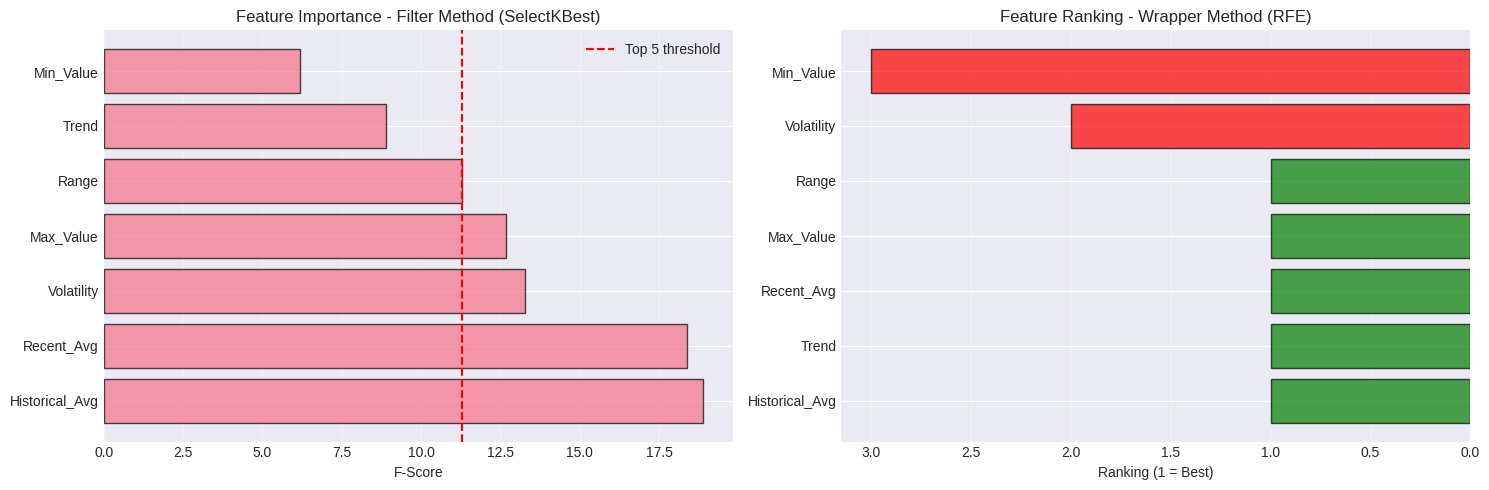

In [ ]:
# Visualize feature selection results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Filter method scores
axes[0].barh(feature_scores['Feature'], feature_scores['F-Score'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('F-Score')
axes[0].set_title('Feature Importance - Filter Method (SelectKBest)')
axes[0].axvline(
    x=feature_scores['F-Score'].nlargest(5).min(),
    color='red',
    linestyle='--',
    label=f'Top {k_best} threshold'
)

axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# RFE ranking
colors = ['green' if selected else 'red' for selected in feature_ranking_rfe['Selected']]
axes[1].barh(feature_ranking_rfe['Feature'], feature_ranking_rfe['Ranking'],
             color=colors, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Ranking (1 = Best)')
axes[1].set_title('Feature Ranking - Wrapper Method (RFE)')
axes[1].invert_xaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('feature_selection.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("="*80)
print("FINAL MODEL - LOGISTIC REGRESSION")
print("="*80)
print("Using: Optimal hyperparameters + Selected features")
print("="*80)

# Build final Logistic Regression model with best parameters and selected features
final_lr_model = LogisticRegression(**lr_grid_search.best_params_, random_state=42)
final_lr_model.fit(X_train_selected, y_train)

# Cross-validation score with selected features
cv_scores_lr_final = cross_val_score(final_lr_model, X_train_selected, y_train, cv=5, scoring='accuracy')
cv_score_lr_final = cv_scores_lr_final.mean()

# Predictions
y_test_pred_lr_final = final_lr_model.predict(X_test_selected)

# Metrics
accuracy_lr_final = accuracy_score(y_test, y_test_pred_lr_final)
precision_lr_final = precision_score(y_test, y_test_pred_lr_final, average='weighted')
recall_lr_final = recall_score(y_test, y_test_pred_lr_final, average='weighted')
f1_lr_final = f1_score(y_test, y_test_pred_lr_final, average='weighted')

print(f"\nCross-Validation Score (5-fold): {cv_score_lr_final:.4f}")
print(f"Test Set Performance:")
print(f"  Accuracy: {accuracy_lr_final:.4f}")
print(f"  Precision: {precision_lr_final:.4f}")
print(f"  Recall: {recall_lr_final:.4f}")
print(f"  F1-Score: {f1_lr_final:.4f}")

print("\n" + "="*80)
print("CLASSIFICATION REPORT - FINAL LOGISTIC REGRESSION")
print("="*80)
print(classification_report(y_test, y_test_pred_lr_final, target_names=['Low Renewables', 'High Renewables']))

FINAL MODEL - LOGISTIC REGRESSION
Using: Optimal hyperparameters + Selected features

Cross-Validation Score (5-fold): 0.9750
Test Set Performance:
  Accuracy: 0.9091
  Precision: 0.9242
  Recall: 0.9091
  F1-Score: 0.9091

CLASSIFICATION REPORT - FINAL LOGISTIC REGRESSION
                 precision    recall  f1-score   support

 Low Renewables       0.83      1.00      0.91         5
High Renewables       1.00      0.83      0.91         6

       accuracy                           0.91        11
      macro avg       0.92      0.92      0.91        11
   weighted avg       0.92      0.91      0.91        11



In [ ]:
print("="*80)
print("FINAL MODEL - RANDOM FOREST")
print("="*80)
print("Using: Optimal hyperparameters + Selected features")
print("="*80)

# Build final Random Forest model with best parameters and selected features
final_rf_model = RandomForestClassifier(**rf_random_search.best_params_, random_state=42)
final_rf_model.fit(X_train_selected, y_train)

# Cross-validation score with selected features
cv_scores_rf_final = cross_val_score(final_rf_model, X_train_selected, y_train, cv=5, scoring='accuracy')
cv_score_rf_final = cv_scores_rf_final.mean()

# Predictions
y_test_pred_rf_final = final_rf_model.predict(X_test_selected)

# Metrics
accuracy_rf_final = accuracy_score(y_test, y_test_pred_rf_final)
precision_rf_final = precision_score(y_test, y_test_pred_rf_final, average='weighted')
recall_rf_final = recall_score(y_test, y_test_pred_rf_final, average='weighted')
f1_rf_final = f1_score(y_test, y_test_pred_rf_final, average='weighted')

print(f"\nCross-Validation Score (5-fold): {cv_score_rf_final:.4f}")
print(f"Test Set Performance:")
print(f"  Accuracy: {accuracy_rf_final:.4f}")
print(f"  Precision: {precision_rf_final:.4f}")
print(f"  Recall: {recall_rf_final:.4f}")
print(f"  F1-Score: {f1_rf_final:.4f}")

print("\n" + "="*80)
print("CLASSIFICATION REPORT - FINAL RANDOM FOREST")
print("="*80)
print(classification_report(y_test, y_test_pred_rf_final, target_names=['Low Renewables', 'High Renewables']))

FINAL MODEL - RANDOM FOREST
Using: Optimal hyperparameters + Selected features

Cross-Validation Score (5-fold): 0.9750
Test Set Performance:
  Accuracy: 0.9091
  Precision: 0.9221
  Recall: 0.9091
  F1-Score: 0.9075

CLASSIFICATION REPORT - FINAL RANDOM FOREST
                 precision    recall  f1-score   support

 Low Renewables       1.00      0.80      0.89         5
High Renewables       0.86      1.00      0.92         6

       accuracy                           0.91        11
      macro avg       0.93      0.90      0.91        11
   weighted avg       0.92      0.91      0.91        11



In [ ]:
print("="*80)
print("COMPARATIVE ANALYSIS - FINAL MODELS")
print("="*80)

# Create comparison table
final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Features': [f"Selected ({len(selected_features_final)})", f"Selected ({len(selected_features_final)})"],
    'CV Score': [cv_score_lr_final, cv_score_rf_final],
    'Accuracy': [accuracy_lr_final, accuracy_rf_final],
    'Precision': [precision_lr_final, precision_rf_final],
    'Recall': [recall_lr_final, recall_rf_final],
    'F1-Score': [f1_lr_final, f1_rf_final]
})

print("\nTable 1: Comparison of Final Classification Models")
print("="*80)
print(final_comparison.to_string(index=False))

# Determine best model
best_final_idx = final_comparison['Accuracy'].idxmax()
best_final_model = final_comparison.loc[best_final_idx, 'Model']
best_final_accuracy = final_comparison.loc[best_final_idx, 'Accuracy']

print("\n" + "="*80)
print("BEST PERFORMING MODEL")
print("="*80)
print(f"Model: {best_final_model}")
print(f"Test Accuracy: {best_final_accuracy:.4f}")
print(f"Cross-Validation Score: {final_comparison.loc[best_final_idx, 'CV Score']:.4f}")
print(f"F1-Score: {final_comparison.loc[best_final_idx, 'F1-Score']:.4f}")

COMPARATIVE ANALYSIS - FINAL MODELS

Table 1: Comparison of Final Classification Models
              Model     Features  CV Score  Accuracy  Precision   Recall  F1-Score
Logistic Regression Selected (5)     0.975  0.909091   0.924242 0.909091  0.909091
      Random Forest Selected (5)     0.975  0.909091   0.922078 0.909091  0.907537

BEST PERFORMING MODEL
Model: Logistic Regression
Test Accuracy: 0.9091
Cross-Validation Score: 0.9750
F1-Score: 0.9091


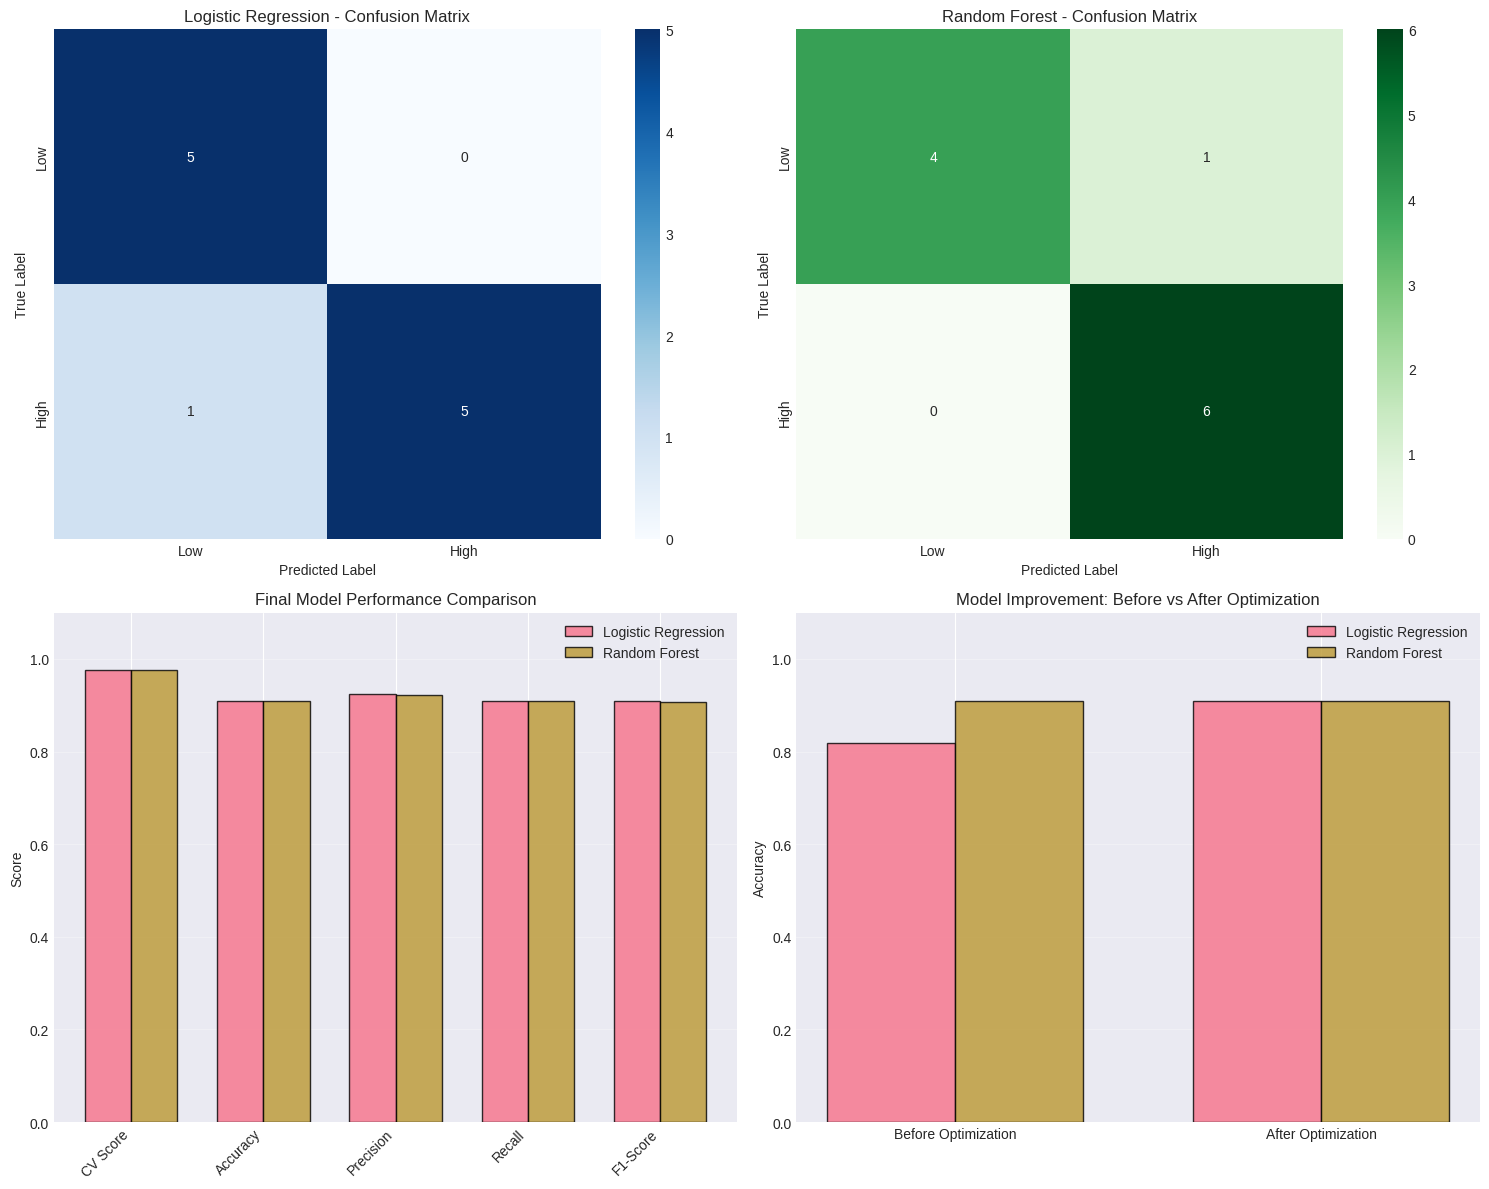


Visualization saved: final_model_comparison.png


In [ ]:
# Visualize final model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion matrices
cm_lr_final = confusion_matrix(y_test, y_test_pred_lr_final)
cm_rf_final = confusion_matrix(y_test, y_test_pred_rf_final)

sns.heatmap(cm_lr_final, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
axes[0, 0].set_title('Logistic Regression - Confusion Matrix')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

sns.heatmap(cm_rf_final, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1],
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
axes[0, 1].set_title('Random Forest - Confusion Matrix')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')

# Performance metrics comparison
models = final_comparison['Model']
metrics = ['CV Score', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_metrics = final_comparison.iloc[0][metrics].values
rf_metrics = final_comparison.iloc[1][metrics].values

x = np.arange(len(metrics))
width = 0.35

axes[1, 0].bar(x - width/2, lr_metrics, width, label='Logistic Regression', alpha=0.8, edgecolor='black')
axes[1, 0].bar(x + width/2, rf_metrics, width, label='Random Forest', alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Final Model Performance Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_ylim([0, 1.1])

# Improvement comparison (Before vs After)
improvement_data = {
    'Logistic Regression': [test_accuracy_lr, accuracy_lr_final],
    'Random Forest': [test_accuracy_rf, accuracy_rf_final]
}
x = np.arange(2)
width = 0.35

axes[1, 1].bar(x - width/2, improvement_data['Logistic Regression'], width,
               label='Logistic Regression', alpha=0.8, edgecolor='black')
axes[1, 1].bar(x + width/2, improvement_data['Random Forest'], width,
               label='Random Forest', alpha=0.8, edgecolor='black')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Model Improvement: Before vs After Optimization')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(['Before Optimization', 'After Optimization'])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('final_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved: final_model_comparison.png")

In [ ]:
print("="*80)
print("CONCLUSION AND REFLECTION")
print("="*80)

CONCLUSION AND REFLECTION
